In [ ]:
!pip install git+https://github.com/autodistill/autodistill-grounded-sam-2 rf_groundingdino -q

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 61.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.5/151.5 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 90.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.4/296.4 kB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.9 MB/s eta 0:00:00


In [ ]:
!wget https://media.roboflow.com/containers.zip
!unzip containers.zip

--2024-09-20 17:46:11--  https://media.roboflow.com/containers.zip
Resolving media.roboflow.com (media.roboflow.com)... 34.110.133.209
Connecting to media.roboflow.com (media.roboflow.com)|34.110.133.209|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12356763 (12M) [application/zip]
Saving to: ‘containers.zip’

containers.zip      100%[===================>]  11.78M  6.89MB/s    in 1.7s    

2024-09-20 17:46:14 (6.89 MB/s) - ‘containers.zip’ saved [12356763/12356763]

Archive:  containers.zip
   creating: containers/
  inflating: containers/Tips-and-tricks-on-how-to-park-a-yard-jockey-_mp4-75_jpg.rf.ffbb8716eb886f91e3a561e2ba4be074.jpg  
  inflating: __MACOSX/containers/._Tips-and-tricks-on-how-to-park-a-yard-jockey-_mp4-75_jpg.rf.ffbb8716eb886f91e3a561e2ba4be074.jpg  
  inflating: containers/Tips-and-tricks-on-how-to-park-a-yard-jockey-_mp4-169_jpg.rf.c0bf90f4b4bf5450508f6ccd5fd85e79.jpg  
  inflating: __MACOSX/containers/._Tips-and-tricks-on-how-to-park-a-ya

In [ ]:
from autodistill_grounded_sam_2 import GroundedSAM2

In [ ]:
from autodistill.detection import CaptionOntology
from autodistill.utils import plot
import numpy as np
import cv2
import os
import random
import supervision as sv

base_model = GroundedSAM2(
    ontology=CaptionOntology(
        {
            "shipping container": "container"
        }
    ),
    model = "Grounding DINO",
    grounding_dino_box_threshold=0.25
)

trying to load grounding dino directly
downloading dino model weights


torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3609.)


final text_encoder_type: bert-base-uncased


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
None of the inputs have requires_grad=True. Gradients will be None


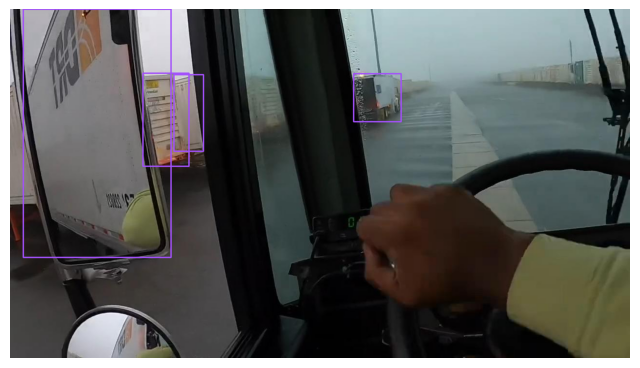

In [ ]:
IMAGE_DIR = "containers"
IMAGE_PATH = os.path.join(IMAGE_DIR, random.choice(os.listdir(IMAGE_DIR)))

results = base_model.predict(IMAGE_PATH).with_nms()
results = results[results.confidence > 0.3]

image = cv2.imread(IMAGE_PATH)

mask_annotator = sv.BoxAnnotator()

annotated_image = mask_annotator.annotate(
	image.copy(), detections=results
)

sv.plot_image(image=annotated_image, size=(8, 8))

In [ ]:
base_model.label(IMAGE_DIR, extension="jpg")

Labeling containers/Tips-and-tricks-on-how-to-park-a-yard-jockey-_mp4-166_jpg.rf.2fefe28297588b125130f67a36c85435.jpg: 100%|██████████| 156/156 [01:16<00:00,  2.03it/s]
Passing a `Dict[str, np.ndarray]` into `DetectionDataset` is deprecated and will be removed in `supervision-0.26.0`. Use a list of paths `List[str]` instead.


Labeled dataset created - ready for distillation.


In [ ]:
import roboflow

roboflow.login()

rf = roboflow.Roboflow()

workspace = rf.workspace("mid-construction-ai")
workspace.upload_dataset(
    IMAGE_DIR + "_labeled/",
    "shipping-containers-ty6p3",
    project_license="MIT",
    project_type="object-detection",
)

visit https://app.roboflow.com/auth-cli to get your authentication token.
Paste the authentication token here: ··········
loading Roboflow workspace...
loading Roboflow project...
Uploading to existing project mid-construction-ai/shipping-containers-ty6p3
[UPLOADED] containers_labeled/train/images/Tips-and-tricks-on-how-to-park-a-yard-jockey-_mp4-147_jpg.rf.4bff07691220cccfde84178d3c6dd5ac.jpg (f8k6UPuCbJot7cybLihk) [1.6s] / annotations = OK [0.7s]
[UPLOADED] containers_labeled/train/images/Tips-and-tricks-on-how-to-park-a-yard-jockey-_mp4-137_jpg.rf.a91dd79941f761e01953077caa6c9552.jpg (YGF9E1aRHkxA9YdZeaG2) [1.7s] / annotations = OK [0.8s]
[UPLOADED] containers_labeled/train/images/Tips-and-tricks-on-how-to-park-a-yard-jockey-_mp4-13_jpg.rf.65c3ac314ae8c53f04a0b6eacdb02ace.jpg (lzxEVeGpA3QsEPnCHkcw) [1.8s] / annotations = OK [0.8s]
[UPLOADED] containers_labeled/train/images/Tips-and-tricks-on-how-to-park-a-yard-jockey-_mp4-145_jpg.rf.a341f79fb0bd03c1ffa4ce8a91286086.jpg (a2AY39fVuuGB

## **Uploaded to Mid Construction AI**

All the images were auto labelled and uploaded to our Workspace of "MID Construction AI"

> Image were labelled in a good way

> Some images jhave inconsistancies that can be adjusted in the workspace

> we can adjust the labelling and save it to train a model onto it





